In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
us_state_abbrev = {
    'United States': 'USA',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York City':"NYC",
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [83]:
df = pd.read_csv("../Folder2/Population_byCDCAgeGroup_byState.csv")

In [113]:
df1 = df.loc[df.CDC_AgeGroups == "Total"][["State","Population"]]
df1.count()

State         50
Population    50
dtype: int64

In [133]:
df2 = pd.read_csv("Land_Area_byState.csv")
df2

,State,Land_Area
0,Alaska,570640.95
1,Texas,261231.71
2,California,155779.22
3,Montana,145545.80
4,New Mexico,121298.15
5,Arizona,113594.08
6,Nevada,109781.18
7,Colorado,103641.89
8,Oregon,95988.01
9,Wyoming,97093.14


In [144]:
a = df2.loc[45,"State"]
len(a)
a[1:len(a)]

'New Hampshire'

In [145]:
for index, rows in  df2.iterrows():
    state = df2.loc[index,"State"]
    new_state = state[1:len(state)]
    df2.loc[index, "State"] = new_state
df_merge = df2.merge(df1, how='inner', on="State")
df2.head(50)

,State,Land_Area
0,Alaska,570640.95
1,Texas,261231.71
2,California,155779.22
3,Montana,145545.80
4,New Mexico,121298.15
5,Arizona,113594.08
6,Nevada,109781.18
7,Colorado,103641.89
8,Oregon,95988.01
9,Wyoming,97093.14


In [146]:
# df_merge = df2.merge(df1, how='inner', on="State")
import numpy as np
df_merge["Pop_Density"]=""
df_merge["log_Pop_Density"]=""
for index, rows in  df_merge.iterrows():
    pop_density = df_merge.loc[index,"Population"]/df_merge.loc[index,"Land_Area"]
    df_merge.loc[index,"Pop_Density"]=pop_density
    state = df_merge.loc[index,"State"]
    df_merge.loc[index,"State"] = us_state_abbrev[state]
    df_merge.loc[index,"log_Pop_Density"] = np.log(pop_density)
    
df_merge.head(50)

,State,Land_Area,Population,Pop_Density,log_Pop_Density
0,AK,570640.95,731545.0,1.28197,0.248399
1,TX,261231.71,28995881.0,110.997,4.7095
2,CA,155779.22,39512223.0,253.642,5.53593
3,MT,145545.80,1068778.0,7.34324,1.99378
4,NM,121298.15,2096829.0,17.2866,2.84993
5,AZ,113594.08,7278717.0,64.0766,4.16008
6,NV,109781.18,3080156.0,28.0572,3.33425
7,CO,103641.89,5758736.0,55.5638,4.01753
8,OR,95988.01,4217737.0,43.9402,3.78283
9,WY,97093.14,578759.0,5.96086,1.78522


In [147]:
df4 = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv",skiprows=[0,1,2])
df4.rename(columns={"Unnamed: 1":"Death_Rate"}, inplace = True)
df_merge_1 = df_merge.merge(df4,how='inner', on="State")

In [148]:
df_merge_1.sort_values(by="Pop_Density",ascending=False)
df_merge.count()

State              50
Land_Area          50
Population         50
Pop_Density        50
log_Pop_Density    50
dtype: int64

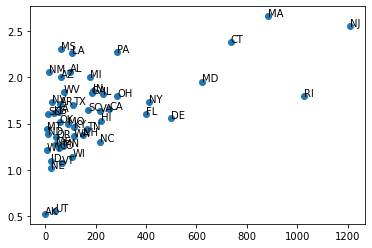

In [150]:
plt.scatter(df_merge_1.Pop_Density, df_merge_1.Death_Rate)
for index, row in df_merge_1.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[3],row[5]))

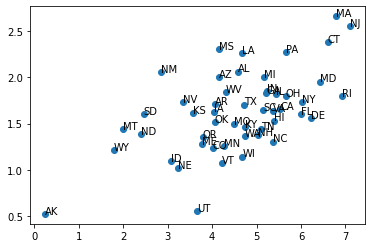

In [151]:
plt.scatter(df_merge_1.log_Pop_Density, df_merge_1.Death_Rate)
for index, row in df_merge_1.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[4],row[5]))